<a href="https://colab.research.google.com/github/robertferro/analisando_risco_credito/blob/main/3-%20Machine%20learning/modelo_risco_de_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo:

Utilizando os dados tratados anteriormente, será desenvolvido um modelo de classificação que seja eficiente para identificar quando o empréstimo for de risco ou não.

Os dados irão passar por um pré-processamento necessário, como transformar variáveis categóricas em valores numéricos e as variáveis contínuas por uma transformação usando MinMaxScaler da biblioteca Sklearn.

Depois os dados serão divididos em amostras de treino, teste e validação, onde será escolhido o melhor modelo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
url='https://raw.githubusercontent.com/robertferro/analisando_risco_credito/main/1-%20Tratamento%20de%20dados%20(ETL)/dados_analise_risco_de_cresdito.csv'

df = pd.read_csv(url,sep=',')

df.head()

,idade,tempo_de_emprego,tipo_moradia,tipo_moradia_id,objetivo_emprestimo,objetivo_emprestimo_id,montante_emprestimo,taxa_juros,renda_por_ano,porc_empr_renda_anual,class_risco_historico,class_risco_historico_id,inadimplencia_hist,qtd_anos_primeiro_emprestimo,risco_emprestimo
0,21,5.0,propria,3,educacao,1,1000,11.14,9600,0.10,B,1,0,2,0
1,25,1.0,hipoteca,1,saude,5,5500,12.87,9600,0.57,C,2,0,3,1
2,23,4.0,alugada,0,saude,5,35000,15.23,65500,0.53,C,2,0,2,1
3,24,8.0,alugada,0,saude,5,35000,14.27,54400,0.55,C,2,1,4,1
4,21,2.0,propria,3,risco,4,2500,7.14,9900,0.25,A,0,0,2,1


In [30]:
# verificando características dos dados e se tem valores ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30881 entries, 0 to 30880
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   idade                         30881 non-null  int64  
 1   tempo_de_emprego              30881 non-null  float64
 2   tipo_moradia                  30881 non-null  object 
 3   tipo_moradia_id               30881 non-null  int64  
 4   objetivo_emprestimo           30881 non-null  object 
 5   objetivo_emprestimo_id        30881 non-null  int64  
 6   montante_emprestimo           30881 non-null  int64  
 7   taxa_juros                    30881 non-null  float64
 8   renda_por_ano                 30881 non-null  int64  
 9   porc_empr_renda_anual         30881 non-null  float64
 10  class_risco_historico         30881 non-null  object 
 11  class_risco_historico_id      30881 non-null  int64  
 12  inadimplencia_hist            30881 non-null  int64  
 13  q

# Pré-processamento dos dados

In [4]:
dados=df.copy()
for col in dados.columns:
    if "_id" in col:
        dados.drop(col,axis=1,inplace=True)
dados.head()

,idade,tempo_de_emprego,tipo_moradia,objetivo_emprestimo,montante_emprestimo,taxa_juros,renda_por_ano,porc_empr_renda_anual,class_risco_historico,inadimplencia_hist,qtd_anos_primeiro_emprestimo,risco_emprestimo
0,21,5.0,propria,educacao,1000,11.14,9600,0.10,B,0,2,0
1,25,1.0,hipoteca,saude,5500,12.87,9600,0.57,C,0,3,1
2,23,4.0,alugada,saude,35000,15.23,65500,0.53,C,0,2,1
3,24,8.0,alugada,saude,35000,14.27,54400,0.55,C,1,4,1
4,21,2.0,propria,risco,2500,7.14,9900,0.25,A,0,2,1


In [15]:
# Criando dicionarios para as variáveis categóricas


dic_tipo_moradia={'propria':0, 'hipoteca':1, 'alugada':2, 'outro':3}
dados['tipo_moradia'] = dados['tipo_moradia'].map(dic_tipo_moradia)

dic_objetivo_emprestimo={'educacao':0, 'saude':1, 'risco':2, 'pessoal':3, 'reformar_casa':4,'consolidacao_debito':5}
dados['objetivo_emprestimo'] = dados['objetivo_emprestimo'].map(dic_objetivo_emprestimo)

dic_class_risco_historico={'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6}
dados['class_risco_historico'] = dados['class_risco_historico'].map(dic_class_risco_historico)



dados.head()

,idade,tempo_de_emprego,tipo_moradia,objetivo_emprestimo,montante_emprestimo,taxa_juros,renda_por_ano,porc_empr_renda_anual,class_risco_historico,inadimplencia_hist,qtd_anos_primeiro_emprestimo,risco_emprestimo
0,21,5.0,0,0,1000,11.14,9600,0.10,1,0,2,0
1,25,1.0,1,1,5500,12.87,9600,0.57,2,0,3,1
2,23,4.0,2,1,35000,15.23,65500,0.53,2,0,2,1
3,24,8.0,2,1,35000,14.27,54400,0.55,2,1,4,1
4,21,2.0,0,2,2500,7.14,9900,0.25,0,0,2,1


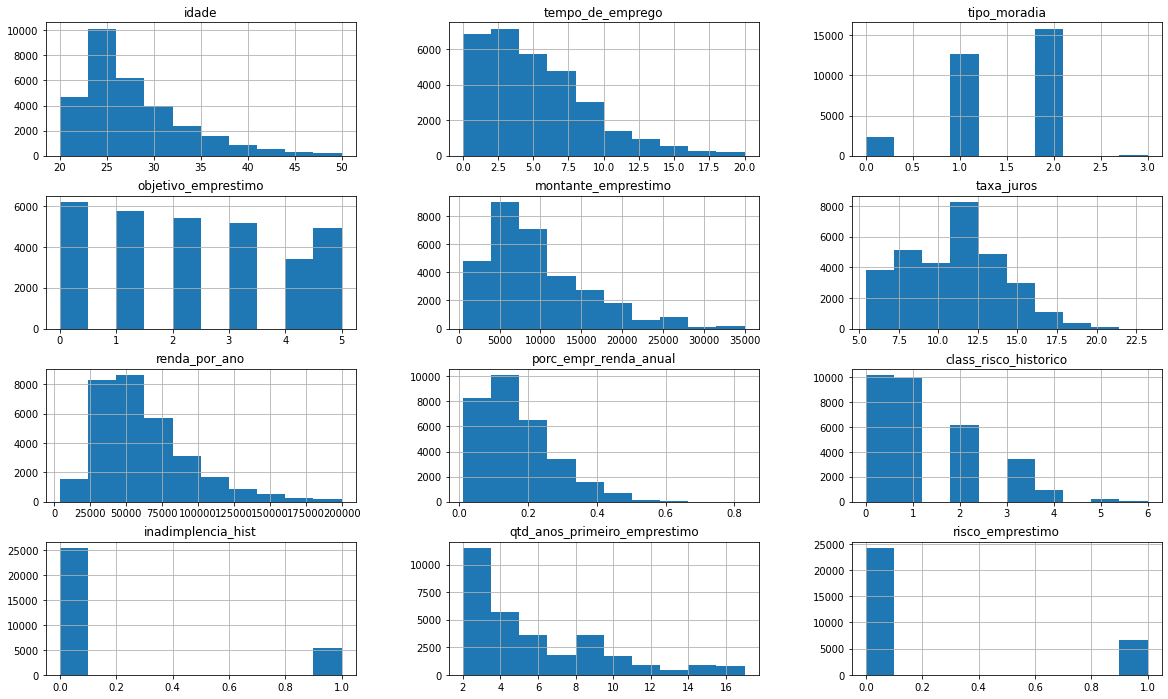

In [16]:
dados.hist(figsize=(20,12));

# Divisão treino e teste e validação

**Separando os dados em treino, teste e validação**

In [39]:
#  criando um dataset apenas com as variáveis numéricas
dados_ml = dados[:26000]
dados_validacao=dados[26000:]


X = dados_ml.drop('risco_emprestimo',axis=1)
y = dados_ml['risco_emprestimo']

# Machine learning

Dividino as amostras em treino e teste

In [40]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,y, test_size=0.3,stratify=y)

In [41]:
X_treino.head()

,idade,tempo_de_emprego,tipo_moradia,objetivo_emprestimo,montante_emprestimo,taxa_juros,renda_por_ano,porc_empr_renda_anual,class_risco_historico,inadimplencia_hist,qtd_anos_primeiro_emprestimo
11705,26,6.0,2,1,11700,11.71,30000,0.39,1,0,2
117,26,7.0,2,5,25000,14.83,54000,0.46,3,1,2
12192,22,7.0,1,5,2825,5.99,84000,0.03,0,0,4
645,24,4.0,2,5,20000,14.84,62400,0.32,3,0,4
20128,27,3.0,2,5,8800,11.71,42000,0.21,1,0,5


In [42]:
# normalizando os dados
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

cols = ['tempo_de_emprego','montante_emprestimo','taxa_juros','renda_por_ano']

for col in cols:
  X_treino[col] = scaler.fit_transform(X_treino[[col]])

X_treino.head()

,idade,tempo_de_emprego,tipo_moradia,objetivo_emprestimo,montante_emprestimo,taxa_juros,renda_por_ano,porc_empr_renda_anual,class_risco_historico,inadimplencia_hist,qtd_anos_primeiro_emprestimo
11705,26,0.315789,2,1,0.324638,0.376872,0.132299,0.39,1,0,2
117,26,0.368421,2,5,0.710145,0.563811,0.254798,0.46,3,1,2
12192,22,0.368421,1,5,0.067391,0.034152,0.407922,0.03,0,0,4
645,24,0.210526,2,5,0.565217,0.564410,0.297673,0.32,3,0,4
20128,27,0.157895,2,5,0.240580,0.376872,0.193548,0.21,1,0,5


- Benchmark

Esse é um modelo aleatório que tomamos como base e devemos obter resultados melhores que o desse classificador.

A acurácia do dummy mostfrequent foi 78.03%
0.5
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      6086
           1       0.00      0.00      0.00      1714

    accuracy                           0.78      7800
   macro avg       0.39      0.50      0.44      7800
weighted avg       0.61      0.78      0.68      7800



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(33.0, 0.5, 'Real ( 1 ou 0)')

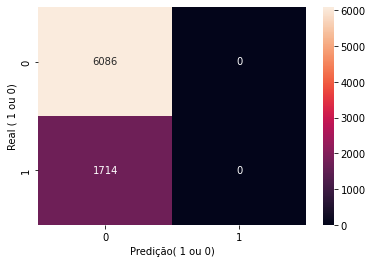

In [44]:
from sklearn.metrics import  roc_auc_score,roc_curve, classification_report
from sklearn import metrics
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_treino, Y_treino)
y_pred = dummy_clf.predict(X_teste)
acuracia = dummy_clf.score(X_teste, Y_teste) * 100

print('A acurácia do dummy mostfrequent foi %.2f%%' % acuracia)

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(Y_teste, y_pred)
sns.heatmap(cm, annot=True, fmt='g')

y_proba = dummy_clf.predict_proba(X_teste)

print(roc_auc_score(Y_teste, y_proba[:,1]))
print(classification_report(Y_teste, y_pred))

plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

- Testando alguns modelos e utilizando validação cruzada.

Validação cruzada garante um modelo mais robusto e ajuda a evitar o overfiting, que é quando ocorre um sobreajuste aos dados de treinamento e o modelo não performa tão bem nos dados de teste quanto foi no treino.


In [45]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

lista_classificacores = [ LogisticRegression(),
                         GaussianNB(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier(),
                         XGBClassifier()]


for clf in lista_classificacores:
  print(clf.__class__.__name__)
  clf.fit(X_treino, Y_treino)
  train_acc = clf.score(X_treino, Y_treino)
  val_score = cross_val_score(clf, X_treino, Y_treino, cv=5)
  test_acc = clf.score(X_teste, Y_teste)
  print('Treino:', train_acc)
  print('Validation score', val_score.mean())
  print('Teste:', test_acc)

  print('ROC AUC')

  y_proba_treino = clf.predict_proba(X_treino)
  roc_treino = roc_auc_score(Y_treino, y_proba_treino[:, 1])
  print('Treino', roc_treino)

  y_proba_teste = clf.predict_proba(X_teste)
  roc_teste = roc_auc_score(Y_teste, y_proba_teste[:, 1])
  print('Test', roc_teste)
  print('='*80)

LogisticRegression
Treino: 0.8531868131868132
Validation score 0.8514285714285714
Teste: 0.7802564102564102
ROC AUC
Treino 0.8602435800133752
Test 0.5
GaussianNB
Treino: 0.8245054945054945
Validation score 0.824010989010989
Teste: 0.7802564102564102
ROC AUC
Treino 0.8503454643324234
Test 0.5
DecisionTreeClassifier
Treino: 1.0
Validation score 0.8836263736263735
Teste: 0.5738461538461539
ROC AUC
Treino 1.0
Test 0.6609029810368767
RandomForestClassifier
Treino: 1.0
Validation score 0.9282967032967033
Teste: 0.8993589743589744
ROC AUC
Treino 1.0
Test 0.8472729557785318
XGBClassifier
Treino: 0.9284615384615384
Validation score 0.9260439560439562
Teste: 0.8875641025641026
ROC AUC
Treino 0.9341545389163994
Test 0.8784770007949072


# Ajustando o XGBClassifier

Dos classificadores testados

In [ ]:
# import xgboost as xgb
# clf=xgb.XGBClassifier()
# _ = clf.fit(X,y)

# # xgb.plot_importance(clf,importance_type='weight')
# feat_imp = clf.get_booster().get_score(importance_type='weight')
# feat_imp_df = pd.DataFrame(feat_imp,index=[0]).T.reset_index()
# feat_imp_df.columns=['Feature','Valor']
# feat_imp_df=feat_imp_df.sort_values('Valor',ascending=False).reset_index(drop=True)
# feat_imp_df

In [55]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

kf = KFold(n_splits=5,random_state=0,shuffle=True)

f1_lista=[]
for i,(tr,ts) in enumerate(kf.split(X)):
    Xtr, ytr = X.iloc[tr], y.iloc[tr]
    Xval, yval = X.iloc[ts], y.iloc[ts]
    
    clf = XGBClassifier(max_depth=15,n_estimators=250,seed=42)
    clf.fit(Xtr,ytr)
    
    y_pred=clf.predict(Xval)

    f1_score_ = f1_score(yval,y_pred)
    f1_lista.append(f1_score_)
    print('Fold: {}'.format(i))
    # print('-'*60)
    print('F1_Score: {:.4f}'.format(f1_score_))
    # print(classification_report(yval, y_pred))
    print('='*40)

f1_medio=np.mean(f1_lista)
print('F1 Score médio: {:.4f}'.format(f1_medio))

Fold: 0
F1_Score: 0.8388
Fold: 1
F1_Score: 0.8295
Fold: 2
F1_Score: 0.8340
Fold: 3
F1_Score: 0.8366
Fold: 4
F1_Score: 0.8371
F1 Score médio: 0.8352


A acurácia do XGBCLassifier foi 93.65%


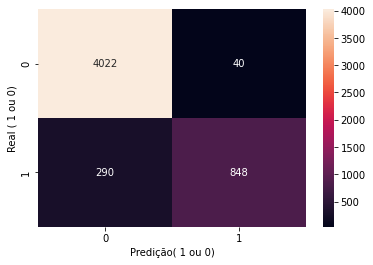

ROC AUC : 0.9430685101489305



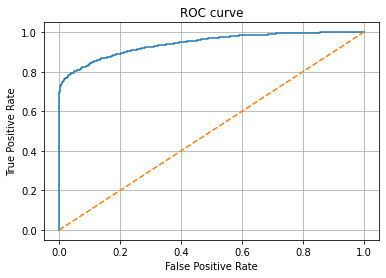

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4062
           1       0.95      0.75      0.84      1138

    accuracy                           0.94      5200
   macro avg       0.94      0.87      0.90      5200
weighted avg       0.94      0.94      0.93      5200



In [70]:
y_pred = clf.predict(Xval)

y_proba = clf.predict_proba(Xval)
cm=confusion_matrix(yval, y_proba[:,1]>0.5)
sns.heatmap(cm, annot=True, fmt='g')
# f1_score_xgb = f1_score(yval,y_pred)
# print('F1 Score do XGBCLassifier foi: {:.4f}'.format(f1_score_xgb))

acuracia = clf.score(Xval, yval) * 100
print('A acurácia do XGBCLassifier foi %.2f%%' % acuracia)


plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')

plt.show()


roc_auc = roc_auc_score(yval, y_proba[:,1])
print('ROC AUC :',roc_auc)

print()

fpr, tpr, thresholds = metrics.roc_curve(yval,y_proba[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], '--')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()


print(classification_report(yval, y_proba[:,1]>0.5))

# Analisando as previsões

In [71]:
#  criando um novo dataset com os valores reais e as probabilidades
analise = Xval.copy()
analise['risco_emprestimo'] = yval
analise['previsao'] = clf.predict(Xval)
analise['pontuacao'] = clf.predict_proba(Xval)[:,1]

analise.head()

,idade,tempo_de_emprego,tipo_moradia,objetivo_emprestimo,montante_emprestimo,taxa_juros,renda_por_ano,porc_empr_renda_anual,class_risco_historico,inadimplencia_hist,qtd_anos_primeiro_emprestimo,risco_emprestimo,previsao,pontuacao
10,21,2.0,0,4,4500,8.63,10000,0.45,0,0,2,1,1,0.999574
13,23,2.0,2,0,35000,7.90,115000,0.30,0,0,4,0,0,0.000690
19,25,9.0,2,3,34800,16.77,137000,0.25,4,1,2,0,0,0.154793
28,21,5.0,0,1,2000,11.12,11520,0.17,1,0,3,1,1,0.995770
40,26,0.0,2,5,30000,6.62,89028,0.34,0,0,3,1,1,0.983587


In [72]:
analise.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,5200.0,25.778462,3.561425,20.000000,23.000000,25.000000,28.000000,35.000000
tempo_de_emprego,5200.0,4.512308,3.606090,0.000000,2.000000,4.000000,7.000000,19.000000
tipo_moradia,5200.0,1.446154,0.645895,0.000000,1.000000,2.000000,2.000000,3.000000
objetivo_emprestimo,5200.0,2.267500,1.725370,0.000000,1.000000,2.000000,4.000000,5.000000
montante_emprestimo,5200.0,9316.769231,6094.269993,500.000000,5000.000000,8000.000000,12000.000000,35000.000000
taxa_juros,5200.0,10.985206,3.052500,5.420000,8.490000,11.024071,13.060000,22.110000
renda_por_ano,5200.0,59853.792500,30438.092671,4800.000000,38000.000000,54000.000000,75000.000000,200000.000000
porc_empr_renda_anual,5200.0,0.173904,0.108915,0.010000,0.090000,0.150000,0.230000,0.770000
class_risco_historico,5200.0,1.202692,1.152062,0.000000,0.000000,1.000000,2.000000,6.000000
inadimplencia_hist,5200.0,0.173462,0.378682,0.000000,0.000000,0.000000,0.000000,1.000000


# Fazendo as previsões para os dados de validação

Nesta etapa irei utilizar os dados separados no início da modelagem, dados que o modelo nunca viu antes e aplicar o algoritmo XGBClassifier.

Separando os dados de validação em X e y

In [73]:
X_val=dados_validacao.drop(columns='risco_emprestimo',axis=1)
y_val=dados_validacao['risco_emprestimo']

F1 Score do XGBCLassifier na validação foi: 0.8373
A acurácia do XGBCLassifier na validação foi 94.32%


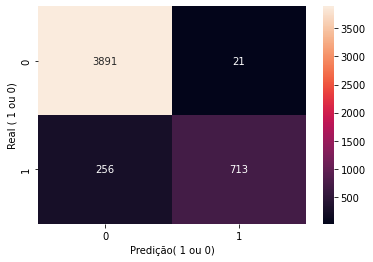

In [74]:
# Ajustando o modelo aos dados de treino e teste
clf.fit(X,y)

# Gerando as previsões
y_pred_validacao=clf.predict(X_val)

# analisando o modelo
cm=confusion_matrix(y_val, y_pred_validacao)
sns.heatmap(cm, annot=True, fmt='g')


f1_score_xgb_validacao=f1_score(y_val,y_pred_validacao)
print('F1 Score do XGBCLassifier na validação foi: {:.4f}'.format(f1_score_xgb_validacao))
acuracia = clf.score(X_val, y_val) * 100
print('A acurácia do XGBCLassifier na validação foi %.2f%%' % acuracia)


plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')
plt.show()

In [75]:
y_proba_validacao = clf.predict_proba(X_val)[:,1]
roc_auc = roc_auc_score(y_val, y_proba_validacao)
print('ROC AUC :',roc_auc)

print()

print(classification_report(y_val, y_proba_validacao>0.5))

ROC AUC : 0.9445702777936058

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      3912
           1       0.97      0.74      0.84       969

    accuracy                           0.94      4881
   macro avg       0.95      0.87      0.90      4881
weighted avg       0.94      0.94      0.94      4881



Salvando o modelo

In [ ]:
import pickle

output = open('modelo_analise_credito', 'wb')
pickle.dump(clf, output)
output.close()


# modelo = open('modelo_analise_credito', 'rb')
# new_model = pickle.load(modelo)
# modelo.close()

In [ ]:

#  abrindo o arquivo salvo
modelo = open('modelo_analise_credito', 'rb')
new_model = pickle.load(modelo)


In [ ]:
new_model.predict_proba(X_teste[0:5])[:,1]